In [1]:
import json
import numpy as np
import pandas as pd

In [2]:
with open('../EvolutionaryFramework/results/2023_03_21_23:12:58/result_0.json') as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [3]:
data = []
for algorithm in parsed_json:
    for generation in parsed_json[algorithm]:
        for front in parsed_json[algorithm][generation]:
            for individual in parsed_json[algorithm][generation][front]:
                data.append({
                    'algorithm': algorithm,
                    'generation': generation,
                    'front': front,
                    'genome': individual["genome"],
                    'stability': individual["fitness"]["stability"],
                    'tension': individual["fitness"]["tension"]
                })
data_df = pd.DataFrame(data)        

In [4]:
data_df.head()

,algorithm,generation,front,genome,stability,tension
0,NSGA-II,generation_1999,front_2,72/0.0625 74/0.0625 67/0.0625 79/0.125 67/0.06...,950.0,-485.0
1,NSGA-II,generation_1999,front_2,59/0.0625 60/0.0625 67/0.0625 67/0.125 67/0.06...,920.0,-480.0
2,NSGA-II,generation_1999,front_2,72/0.0625 69/0.125 67/0.125 67/0.0625 65/0.125...,250.0,-40.0
3,NSGA-II,generation_1999,front_2,60/0.125 65/0.0625 69/0.125 67/0.0625 67/0.062...,200.0,-10.0
4,NSGA-II,generation_1999,front_2,60/0.0625 63/0.0625 79/0.0625 69/0.125 67/0.06...,765.0,-250.0


In [5]:
data_df.loc[0]

algorithm                                               NSGA-II
generation                                      generation_1999
front                                                   front_2
genome        72/0.0625 74/0.0625 67/0.0625 79/0.125 67/0.06...
stability                                                 950.0
tension                                                  -485.0
Name: 0, dtype: object

In [6]:
generation = data_df[data_df["generation"] == "generation_500"].sort_values(by=['front'])

In [7]:
X, Y = [], []
for front in generation["front"].unique():
    X_front, Y_front = [], []
    front_data = generation[generation["front"] == front]
    for stability in front_data["stability"]:
        X_front.append(stability)
    for tension in front_data["tension"]:
        Y_front.append(tension)
    X.append(X_front)
    Y.append(Y_front)

In [8]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

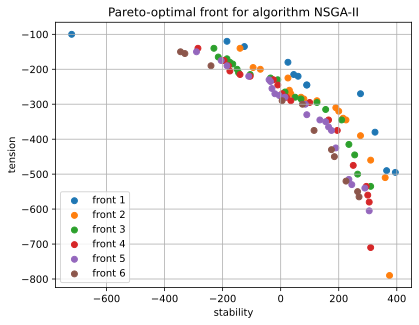

In [9]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm NSGA-II")
ax.set_xlabel("stability")
ax.set_ylabel("tension")
ax.grid()

for i, (x,y) in enumerate(zip(X, Y)):
    
    ax.scatter(x, y, label = f"front {i+1}")

plt.legend()
plt.show()


In [10]:
stability = generation[generation["front"] == "front_1"].sort_values(by='stability')

In [12]:
stability

,algorithm,generation,front,genome,stability,tension
439792,NSGA-II,generation_500,front_1,69/0.0625 69/0.125 74/0.25 71/0.125 72/0.1875 ...,-720.0,-100.0
439794,NSGA-II,generation_500,front_1,73/0.0625 71/0.1875 72/0.1875 59/0.375 62/0.06...,-185.0,-120.0
439797,NSGA-II,generation_500,front_1,57/0.0625 67/0.6875 67/0.125 R/0.0625 64/0.062...,-125.0,-135.0
439793,NSGA-II,generation_500,front_1,64/0.875 64/0.0625 64/0.0625 74/0.0625 74/0.18...,25.0,-180.0
439799,NSGA-II,generation_500,front_1,71/0.0625 71/0.375 81/0.0625 79/0.0625 74/0.18...,45.0,-215.0
439798,NSGA-II,generation_500,front_1,71/0.0625 71/0.375 81/0.0625 79/0.25 67/0.0625...,60.0,-220.0
439795,NSGA-II,generation_500,front_1,72/0.1875 70/0.3125 79/0.125 79/0.125 74/0.125...,90.0,-245.0
439796,NSGA-II,generation_500,front_1,78/0.0625 71/0.3125 79/0.4375 74/0.0625 64/0.0...,90.0,-245.0
439791,NSGA-II,generation_500,front_1,84/0.5 79/0.125 76/0.125 76/0.0625 67/0.0625 7...,275.0,-270.0
439790,NSGA-II,generation_500,front_1,71/0.0625 71/0.0625 79/0.0625 67/0.125 67/0.06...,325.0,-380.0


In [13]:
stability.loc[439788]['genome']

'72/0.3125 79/0.125 71/0.0625 79/0.125 79/0.0625 55/0.1875 69/0.0625 81/0.0625 79/0.0625 62/0.0625 74/0.0625 62/0.3125 50/0.125 74/0.125 79/0.0625 83/0.0625 83/0.0625 83/0.0625 76/0.125 72/0.0625 57/0.0625 67/0.375 76/0.0625 72/0.1875 72/0.0625 72/0.0625 77/0.3125 65/0.3125 63/0.125 52/0.0625 57/0.0625 57/0.0625 69/0.0625 '